In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/sumit/Downloads/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
#Which embarkation point had the highest survival rate?

Survival_rate = data.groupby("Embarked")["Survived"].mean().sort_values(ascending=False)*100
print("Embarkation point had the highest survival rate",Survival_rate)

Embarkation point had the highest survival rate Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


In [10]:
#Calculate the average fare paid by each passenger class.

avg_fare = data.groupby("Pclass")["Fare"].agg(["count","sum"])
avg_fare_agg = (avg_fare["sum"]/avg_fare["count"])*100
avg_fare_agg

Pclass
1    8415.468750
2    2066.218315
3    1367.555010
dtype: float64

In [12]:
#Find the total number of survivors grouped by gender.
survivors=data[data["Survived"] == 1].groupby("Sex")["Survived"].value_counts()
survivors

Sex     Survived
female  1           233
male    1           109
Name: count, dtype: int64

In [14]:
#Display the median age of survivors vs non-survivors.
median_age = data.groupby("Survived")["Age"].median()
median_age

Survived
0    28.0
1    28.0
Name: Age, dtype: float64

In [19]:
#Which class had the most children (Age < 10)?

children = data[data["Age"]<10].groupby("Pclass")["Age"].count()
most_children = children.idxmax()
print(most_children ,"class had the most children (Age < 10)")

3 class had the most children (Age < 10)


C:\Users\sumit\AppData\Local\Temp\ipykernel_11800\166049017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x="Pclass",y="Fare",palette="Set2")


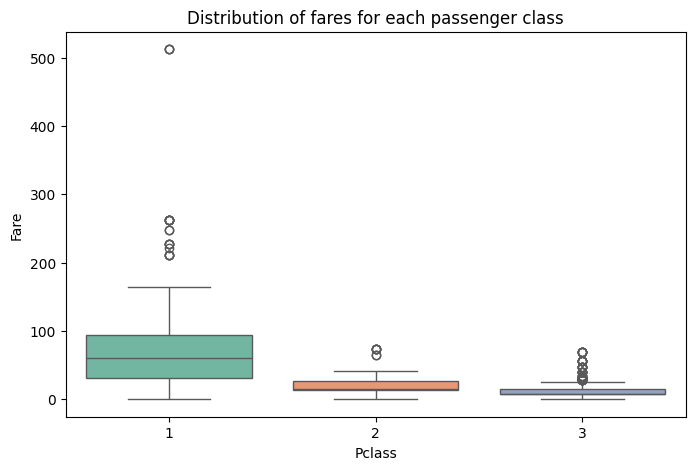

In [23]:
#Plot the distribution of fares for each passenger class
plt.figure(figsize=(8,5))
sns.boxplot(data=data,x="Pclass",y="Fare",palette="Set2")
plt.title("Distribution of fares for each passenger class")
plt.show()

C:\Users\sumit\AppData\Local\Temp\ipykernel_11800\2950963631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data,x="Pclass" , y = "Fare" , palette="Set3")


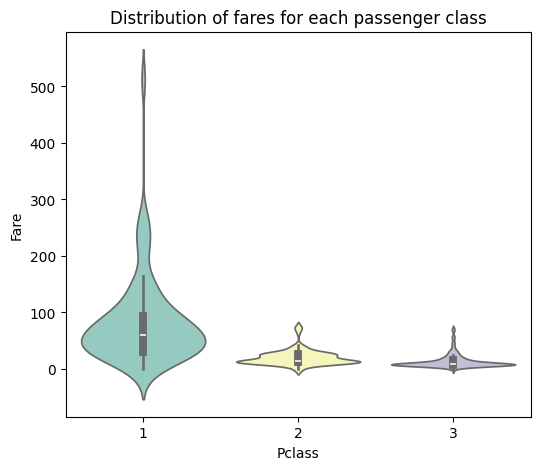

In [25]:
plt.figure(figsize=(6,5))
sns.violinplot(data=data,x="Pclass" , y = "Fare" , palette="Set3")
plt.title("Distribution of fares for each passenger class")
plt.show()

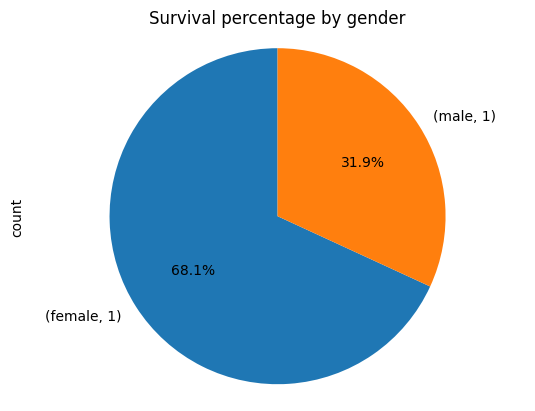

In [30]:
#Create a pie chart showing survival percentage by gender.

survival = data[data["Survived"]==1].groupby("Sex")["Survived"].value_counts()
survival.plot(kind="pie",autopct = "%1.1f%%",startangle=90)
plt.title("Survival percentage by gender")
plt.axis("equal")
plt.show()

C:\Users\sumit\AppData\Local\Temp\ipykernel_11800\3334138909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x="Pclass",y ="Age",palette="Set2")


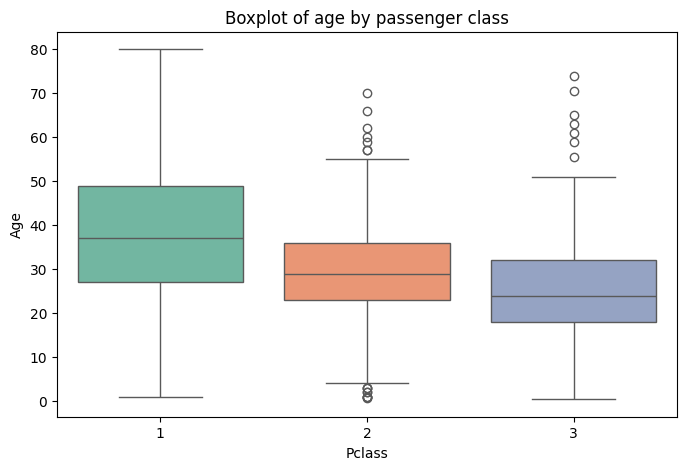

In [33]:
#Show a boxplot of age by passenger class.

plt.figure(figsize=(8,5))
sns.boxplot(data=data,x="Pclass",y ="Age",palette="Set2")
plt.title("Boxplot of age by passenger class")
plt.show()

C:\Users\sumit\AppData\Local\Temp\ipykernel_11800\451256364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data,x="Sex",y="Fare",palette="Set3")


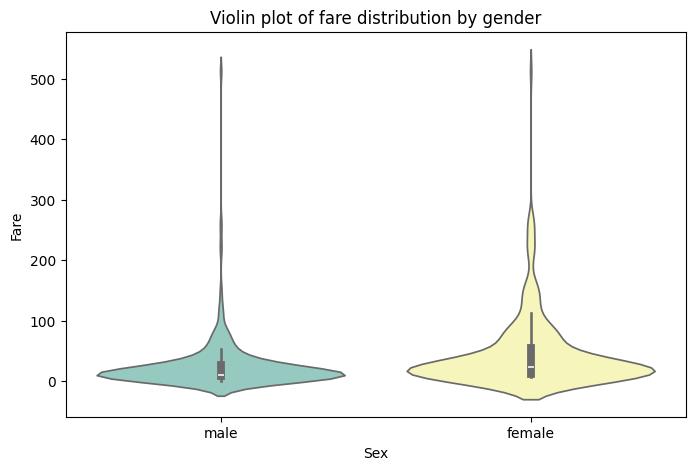

In [42]:
#Draw a violin plot of fare distribution by gender.

plt.figure(figsize=(8,5))
sns.violinplot(data=data,x="Sex",y="Fare",palette="Set3")
plt.title("Violin plot of fare distribution by gender")
plt.show()

<Figure size 600x500 with 0 Axes>

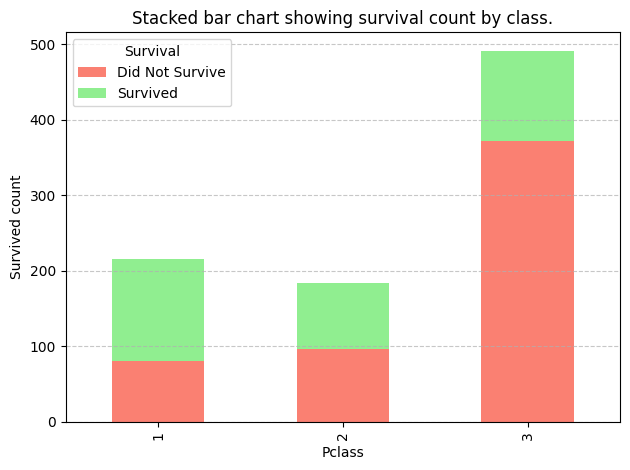

In [51]:
#Plot a stacked bar chart showing survival count by class.
survival_count = data.groupby(["Pclass","Survived"]).size().unstack(fill_value=0)
plt.figure(figsize=(6,5))
survival_count.plot(kind="bar",stacked=True,color=["salmon", "lightgreen"])
plt.title("Stacked bar chart showing survival count by class.")
plt.legend(["Did Not Survive", "Survived"], title="Survival")
plt.ylabel("Survived count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [56]:
survival_data = data.groupby(["Pclass", "Survived"]).size().unstack(fill_value=0)   #.size().unstack() → creates a DataFrame with Survived=0 and Survived=1 as columns
survival_data

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [54]:
survival_data = data.groupby("Pclass") ["Survived"].size()
survival_data

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [57]:
#Create a new column IsMinor: True if Age < 18, else False.
data["IsMinor"] = data["Age"]<18

In [60]:
#Add a column FareBucket: 'Low' (<20), 'Medium' (20–50), 'High' (>50).
fare_bins=[0,20,50,data["Fare"].max()]     # max ensures all fares are included
fare_labels = ["0-20","20-50","50+"]
data["FareBucket"]=pd.cut(data["Fare"],bins=fare_bins,labels=fare_labels)

data[["FareBucket","Fare"]]
                     

,FareBucket,Fare
0,0-20,7.2500
1,50+,71.2833
2,0-20,7.9250
3,50+,53.1000
4,0-20,8.0500
...,...,...
886,0-20,13.0000
887,20-50,30.0000
888,20-50,23.4500
889,20-50,30.0000
